### Real World

### Scenario

I want to measure the "On Time Delivery" performance of delivery of Products to our customers to determine if we are hitting the commitments communicated at the time of ordering.

* We ship 4 product offerings : LowEnd, Good, Better, Super
* There is a manufacturing lead time target on each in days: 2, 3, 3, 4
* We supply 5 countries: UK, Germany, France, Netherlands, Spain.
* There is a logistics lead time target on each in days: 2, 4, 3, 3, 5
* Target to hit "On Time Delivery" is to come in under Manufacturing + Logistics Lead time

The idea is to determine how we are performing to the target Lead times promised
Where we are off target what are the factors and do we need to change the commitments to the customer? 


### Creating the Dataset 

https://www.youtube.com/watch?v=hUes6y2b--0

In [43]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
import pandas as pd

### Creating a Dataframe

In [64]:
rawdata= {'Product':["LowEnd","Good","Better","Best"],
          'Country':["UK", "Germany", "France", "Netherlands"],
          'MLT':[2, 3, 3, 4],
          'LLT':[2, 4, 3, 3]}
df=pd.DataFrame(rawdata)
df

,Country,LLT,MLT,Product
0,UK,2,2,LowEnd
1,Germany,4,3,Good
2,France,3,3,Better
3,Netherlands,3,4,Best


In [63]:
df['Total LT'] = (df.MLT + df.LLT)
df.head()

,Country,LLT,MLT,Product,Total LT
0,UK,2,2,LowEnd,4
1,Germany,4,3,Good,7
2,France,3,3,Better,6
3,Netherlands,3,4,Best,7


In [53]:
df = pd.DataFrame(columns=['Product', 'Country', 'ManufacturingLT', 'LogisticsLT', 'Total LT',"TargetMLT","TargetLLT", "Status"])

In [54]:
df

,Product,Country,ManufacturingLT,LogisticsLT,Total LT,TargetMLT,TargetLLT,Status


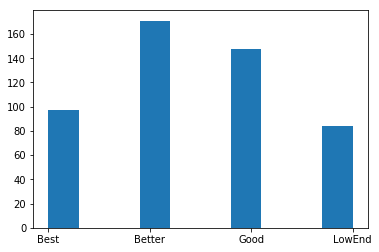

In [50]:
# Randomly select a list of Products Sold (restricted by setting probability)
Product=["LowEnd","Good","Better","Best"]
x=np.random.choice(Product,500,p=[0.15,0.35,0.30,0.20]) #p sets the probability
np.random.seed(124)
plt.hist(x)
plt.show()
x

https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.html


In [57]:
y=np.random.randint(-1,6,1000)
# randn gives a normal distribution which is what i would expect here

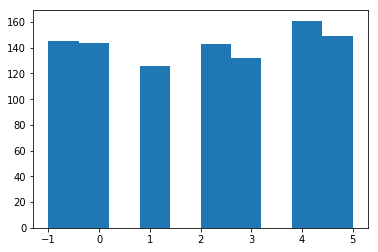

In [58]:
plt.hist(y)
plt.show()

In [30]:
np.random.random_integers(5)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: This function is deprecated. Please call randint(1, 5 + 1) instead
  """Entry point for launching an IPython kernel.


4

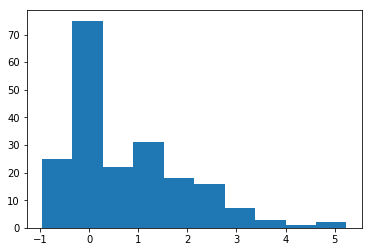

In [56]:
y=np.random.normal(0,2,200)
y[y < 0] = 0 # need to manage the negatives
#https://stackoverflow.com/questions/10335090/numpy-replace-negative-values-in-array
plt.hist(y)
plt.show()

In [54]:
y

array([  5.17704818e-01,   5.49511894e+00,   7.63318372e-02,
         1.94805573e+00,  -9.58536234e-02,   1.86280720e+00,
         2.72823798e+00,   3.25214224e+00,   7.27149564e+00,
         2.54623668e+00,   3.51770133e+00,   4.21897096e+00,
         3.77076874e+00,   4.07939986e+00,   2.64953652e+00,
         4.95935455e+00,   4.10109809e+00,   1.02507984e+00,
         1.81959654e+00,  -9.57223268e-02,   2.52123076e+00,
         2.02944665e+00,   5.69387439e-01,   4.11669156e+00,
         4.68088073e+00,   3.10102331e+00,   5.42236503e+00,
         3.54050286e+00,   2.57930603e+00,   2.28309737e+00,
         2.78877590e-01,   3.43834690e+00,   4.64533268e+00,
         5.79799989e+00,  -3.16629527e-01,   5.43779337e-01,
         7.16284847e-01,   3.46830614e+00,   2.80300256e+00,
         4.22452562e+00,  -2.17689495e+00,   3.65271781e+00,
        -1.91919808e+00,   1.65784792e+00,   4.53125850e+00,
         1.28533769e+00,   3.66358629e+00,   2.37486075e+00,
         1.39069210e+00,